In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
from sklearn.datasets import load_boston

In [77]:
boson_data = load_boston()

In [78]:
boston_df = pd.DataFrame(boson_data.data, columns = [boson_data.feature_names])

In [79]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [80]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


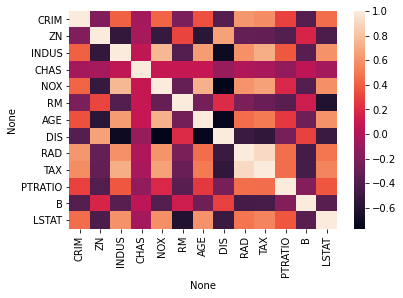

In [81]:
sns.heatmap(boston_df.corr())

In [83]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(boston_df[boson_data.feature_names], boson_data.target)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr = LinearRegression()

In [88]:
lr.fit(x_train,y_train)

LinearRegression()

In [89]:
y_pred = lr.predict(x_test)

In [90]:
y_pred_train = lr.predict(x_train)

In [91]:
from sklearn.metrics import r2_score

In [92]:
r2_score(y_pred, y_test)

0.43537133979210896

In [93]:
r2_score(y_pred_train, y_train)

0.7083099105731123

In [94]:
# No oerfitting and no underfitting

Now let's try with Logistic Regression

In [95]:
from sklearn.linear_model import Ridge

for alpha_val in [0.001, 0.01, 0.1, 0.05]:
    ridge_model = Ridge(alpha=alpha_val, normalize=True)

    ridge_model.fit(x_train, y_train)

    y_pred = ridge_model.predict(x_test)

    y_pred_train = ridge_model.predict(x_train)

    print(f"Test Accuracy---- Alpha value {str(alpha_val)}----", r2_score(y_pred, y_test))
    print(f"Train Accuracy---- Alpha value {str(alpha_val)}----", r2_score(y_pred_train, y_train))

Test Accuracy---- Alpha value 0.001---- 0.43467406599266867
Train Accuracy---- Alpha value 0.001---- 0.7079181454227377
Test Accuracy---- Alpha value 0.01---- 0.4284463268048766
Train Accuracy---- Alpha value 0.01---- 0.7043344242183489
Test Accuracy---- Alpha value 0.1---- 0.36953555945312466
Train Accuracy---- Alpha value 0.1---- 0.6652904150685319
Test Accuracy---- Alpha value 0.05---- 0.4016492043882066
Train Accuracy---- Alpha value 0.05---- 0.6875167038201797


In [96]:
from sklearn.linear_model import Lasso

In [97]:
for alpha_val in [0.001, 0.01, 0.1, 0.05]:
    lasso_model = Lasso(alpha=alpha_val, normalize=True)
    lasso_model.fit(x_train, y_train)

    y_pred = lasso_model.predict(x_test)

    y_pred_train = lasso_model.predict(x_train)

    print(f"Test Accuracy---- Alpha value {str(alpha_val)}----", r2_score(y_pred, y_test))
    print(f"Train Accuracy---- Alpha value {str(alpha_val)}----", r2_score(y_pred_train, y_train))

Test Accuracy---- Alpha value 0.001---- 0.4268504335170752
Train Accuracy---- Alpha value 0.001---- 0.705108640297506
Test Accuracy---- Alpha value 0.01---- 0.35643280990821324
Train Accuracy---- Alpha value 0.01---- 0.667378224313485
Test Accuracy---- Alpha value 0.1---- -0.35109924929510705
Train Accuracy---- Alpha value 0.1---- 0.06018126124872225
Test Accuracy---- Alpha value 0.05---- 0.09558601643877729
Train Accuracy---- Alpha value 0.05---- 0.4593854391574588


In [98]:
from sklearn.linear_model import ElasticNet

In [99]:
for alpha_val in [0.001, 0.01, 0.1, 0.05]:
    elastic_model = ElasticNet(alpha=alpha_val, normalize=True)
    elastic_model.fit(x_train, y_train)

    y_pred = elastic_model.predict(x_test)

    y_pred_train = elastic_model.predict(x_train)

    print(f"Test Accuracy---- Alpha value {str(alpha_val)}----", r2_score(y_pred, y_test))
    print(f"Train Accuracy---- Alpha value {str(alpha_val)}----", r2_score(y_pred_train, y_train))

Test Accuracy---- Alpha value 0.001---- 0.3093096383341336
Train Accuracy---- Alpha value 0.001---- 0.6210927511783623
Test Accuracy---- Alpha value 0.01---- -0.9512767845056398
Train Accuracy---- Alpha value 0.01---- -0.5401545274580226
Test Accuracy---- Alpha value 0.1---- -59.916555633711525
Train Accuracy---- Alpha value 0.1---- -61.1164542608344
Test Accuracy---- Alpha value 0.05---- -14.148744762055202
Train Accuracy---- Alpha value 0.05---- -13.913593972792858
